# Sparse Hebbian Learning : testing two different learning rates strategies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10

tag = 'learning-rates'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HAP', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : cache_dir/data_data
Data is of shape : (65520, 324) - done in 0.15s.


## fixed learning rate

No cache found cache_dir/learning-rates_fixed_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1024 (elapsed time:   0s,   0mn   0s)
Iteration  17 /   1024 (elapsed time:   7s,   0mn   7s)
Iteration  33 /   1024 (elapsed time:  12s,   0mn  12s)
Iteration  49 /   1024 (elapsed time:  17s,   0mn  17s)
Iteration  65 /   1024 (elapsed time:  23s,   0mn  23s)
Iteration  81 /   1024 (elapsed time:  28s,   0mn  28s)
Iteration  97 /   1024 (elapsed time:  34s,   0mn  34s)
Iteration  113 /   1024 (elapsed time:  39s,   0mn  39s)
Iteration  129 /   1024 (elapsed time:  44s,   0mn  44s)
Iteration  145 /   1024 (elapsed time:  50s,   0mn  50s)
Iteration  161 /   1024 (elapsed time:  55s,   0mn  55s)
Iteration  177 /   1024 (elapsed time:  60s,   1mn   0s)
Iteration  193 /   1024 (elapsed time:  66s,   1mn   6s)
Iteration  209 /   1024 (elapsed time:  72s,   1mn  12s)
Iteration  225 /   1024 (elapsed time:  77s,   1mn  17s)
Iteration  241 /   1024 (elap

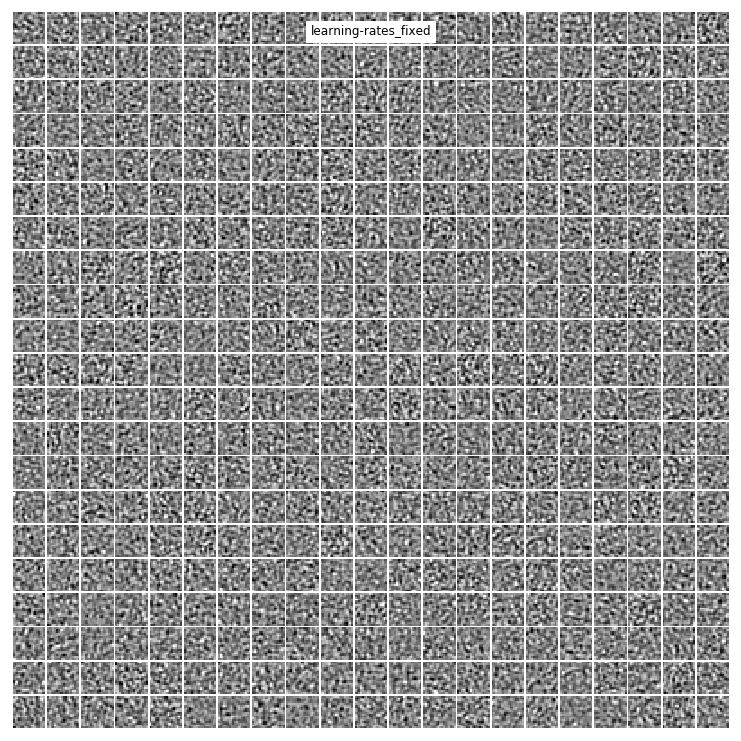

In [4]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, beta1=0., **deepcopy(opts))
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

No cache found cache_dir/learning-rates_ADAM_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1024 (elapsed time:   0s,   0mn   0s)
Iteration  17 /   1024 (elapsed time:   6s,   0mn   6s)
Iteration  33 /   1024 (elapsed time:  11s,   0mn  11s)
Iteration  49 /   1024 (elapsed time:  17s,   0mn  17s)
Iteration  65 /   1024 (elapsed time:  23s,   0mn  23s)
Iteration  81 /   1024 (elapsed time:  28s,   0mn  28s)
Iteration  97 /   1024 (elapsed time:  34s,   0mn  34s)
Iteration  113 /   1024 (elapsed time:  39s,   0mn  39s)
Iteration  129 /   1024 (elapsed time:  45s,   0mn  45s)
Iteration  145 /   1024 (elapsed time:  50s,   0mn  50s)
Iteration  161 /   1024 (elapsed time:  55s,   0mn  55s)
Iteration  177 /   1024 (elapsed time:  60s,   1mn   0s)
Iteration  193 /   1024 (elapsed time:  65s,   1mn   5s)
Iteration  209 /   1024 (elapsed time:  70s,   1mn  10s)
Iteration  225 /   1024 (elapsed time:  75s,   1mn  15s)
Iteration  241 /   1024 (elaps

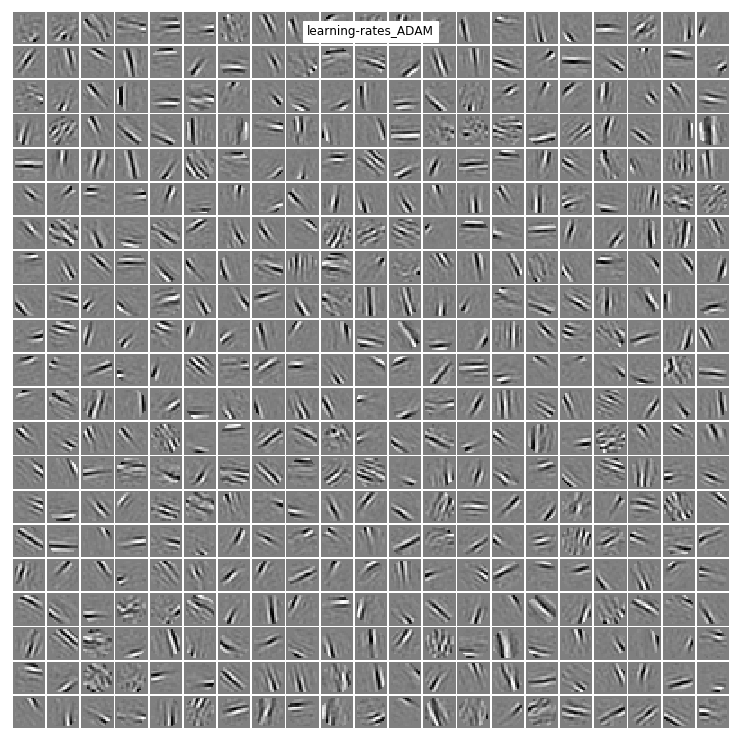

In [5]:
matname = tag + '_ADAM'
shl = SHL(eta=.002, beta1=.9, beta2=.999, epsilon=1.e-8, **deepcopy(opts))
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

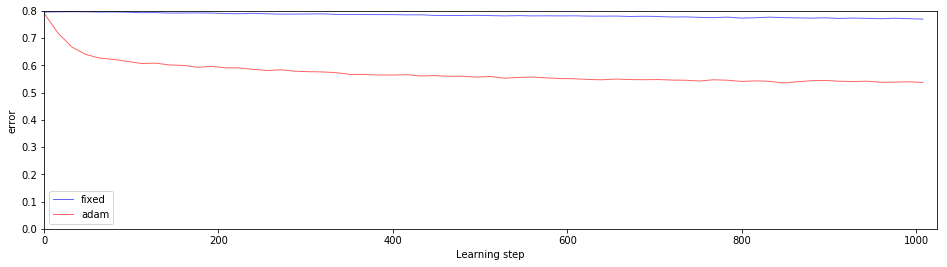

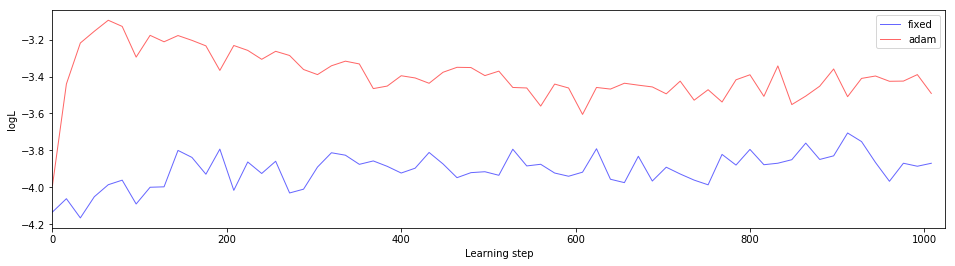

In [6]:
for variable in ['error', 'logL']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_fixed, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='fixed')
    fig_error, ax_error = shl.time_plot(dico_adam, variable=variable, fig=fig_error, ax=ax_error, color='red', label='adam')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
Fri Sep 07 15:12:43 2018 CEST